In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

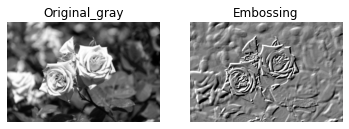

In [8]:
img = cv2.imread('./rose.bmp')

gray_img = np.float32(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

dst = np.array([[-1, -1, 0], [-1, 0, 1], [0, 1, 1]])

output = cv2.filter2D(gray_img, -1, dst) + 128

output[output > 255] = 255
output[output < 0] = 0
output = np.uint8(output)


plt.subplot(1,2,1)
plt.title('Original_gray')
plt.axis('off')
plt.imshow(gray_img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Embossing')
plt.axis('off')
plt.imshow(output, cmap='gray')
plt.show()

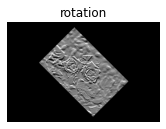

In [16]:
#이미지회전
height,width, channel = img.shape

matrix = cv2.getRotationMatrix2D((width / 2, height / 2),-45,0.5)
rot = cv2.warpAffine(output,matrix,(width,height))

plt.subplot(1,2,1)
plt.title('rotation')
plt.axis('off')
plt.imshow(rot, cmap='gray')
plt.show()

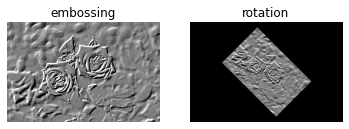

In [17]:
plt.subplot(1,2,1)
plt.title('embossing')
plt.axis('off')
plt.imshow(output, cmap='gray')

plt.subplot(1,2,2)
plt.title('rotation')
plt.axis('off')
plt.imshow(rot, cmap='gray')
plt.show()

In [18]:
embo = cv2.resize(output,(400,400))
rotation = cv2.resize(rot,(400,400))

dst = np.hstack((embo,rotation))
cv2.imshow('embossing',dst)
cv2.waitKey()
cv2.destroyAllWindows()